In [100]:
import pandas as pd
file_name_no_suffix="dataset/consumption-1y-processed"
file_name = file_name_no_suffix+".csv"
csv = pd.read_csv(data_file, index_col="Id")
total_rows = len(csv)

In [22]:


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(csv)
pca = PCA()
pca.fit(data_scaled)

PCA()

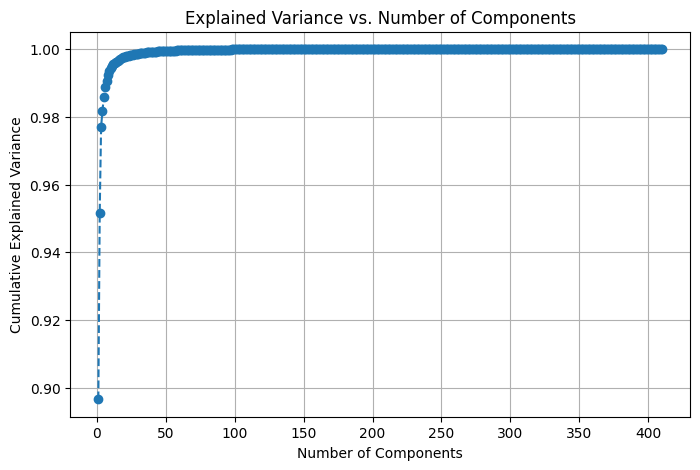

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# Calculate explained variance ratios
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [27]:
# Choose the number of components that explain at least 95% of the variance
threshold = 0.95
n_components = npx.argmax(explained_variance_ratio >= threshold) + 1
n_components

2

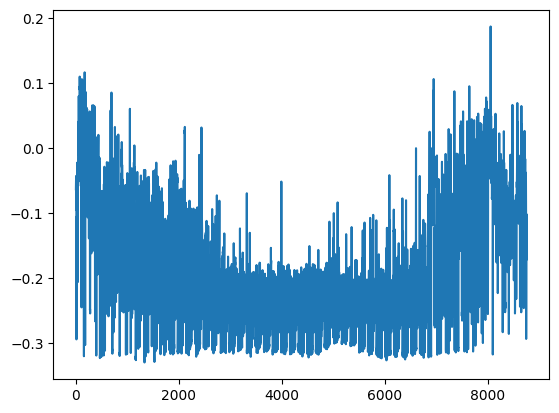

In [31]:
data_scaled
row_nr = 0
plt.plot(data_scaled[row_nr,:])

In [32]:
data_scaled[row_nr,:]

array([-0.0632253 , -0.05641702, -0.05859168, ..., -0.13862735,
       -0.1347294 , -0.12185967])

In [95]:
pca_reduced = PCA(n_components=50)
data_reduced = pca_reduced.fit_transform(data_scaled)

In [109]:
data_reversed = pca_reduced.inverse_transform(data_reduced)

array([[-0.03684806, -0.06698521, -0.06752678, ..., -0.09111576,
        -0.08641375, -0.01463332],
       [-0.26230296, -0.26339221, -0.26605393, ..., -0.23522237,
        -0.22959393, -0.27641353],
       [11.91970626, 11.84413816, 11.91012098, ...,  9.81601241,
         9.18514308,  9.32518102],
       ...,
       [ 0.08374664,  0.09376008,  0.08440958, ..., -0.09378901,
        -0.0729674 , -0.09909986],
       [-0.12095108, -0.12700783, -0.12693761, ..., -0.16592647,
        -0.15057548, -0.16663319],
       [-0.22228355, -0.22594558, -0.22778636, ..., -0.21591196,
        -0.20798968, -0.24517573]])

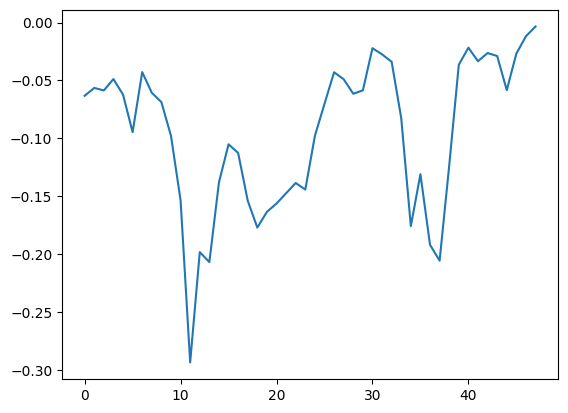

In [81]:
plt.plot(data_scaled[row_nr,:48])

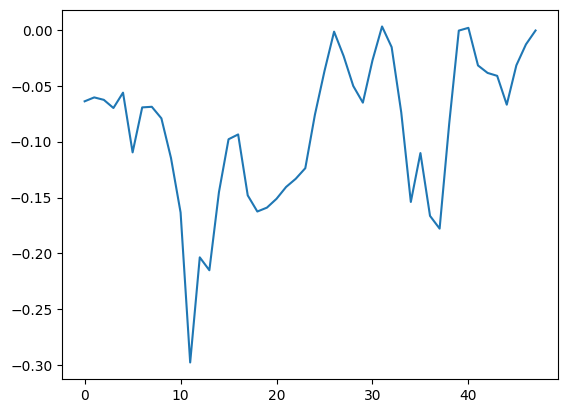

In [80]:
plt.plot(data_reversed[row_nr,:48])

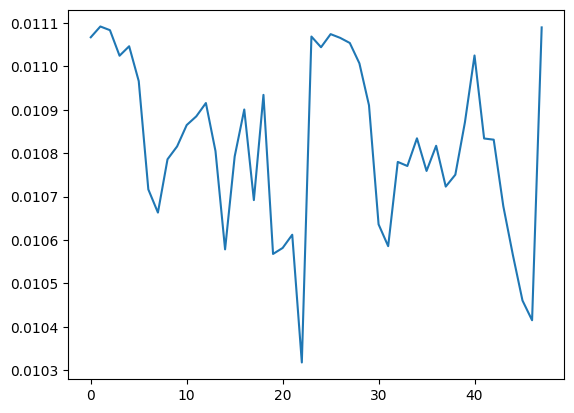

In [69]:
plt.plot(pca_reduced.components_[0,:48])

In [98]:
column_names = [f"pca_{i}" for i in range(pca_reduced.n_components_)]

In [102]:
data_reduced_df = pd.DataFrame(data_reduced, columns=column_names, index=csv.index)

data_reduced_df.to_csv(f"{file_name_no_suffix}_PCA_{pca_reduced.n_components_}.csv", index=True)


In [105]:
import pickle
pca_file_name = f'encoders/PCA_{pca_reduced.n_components_}.pkl'
output = open(pca_file_name, 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(pca_reduced, output)


In [108]:
# Load PCA data
pkl_file = open(pca_file_name, 'rb')

pca_loaded = pickle.load(pkl_file)

pca_loaded.inverse_transform(data_reduced)

array([[-0.03684806, -0.06698521, -0.06752678, ..., -0.09111576,
        -0.08641375, -0.01463332],
       [-0.26230296, -0.26339221, -0.26605393, ..., -0.23522237,
        -0.22959393, -0.27641353],
       [11.91970626, 11.84413816, 11.91012098, ...,  9.81601241,
         9.18514308,  9.32518102],
       ...,
       [ 0.08374664,  0.09376008,  0.08440958, ..., -0.09378901,
        -0.0729674 , -0.09909986],
       [-0.12095108, -0.12700783, -0.12693761, ..., -0.16592647,
        -0.15057548, -0.16663319],
       [-0.22228355, -0.22594558, -0.22778636, ..., -0.21591196,
        -0.20798968, -0.24517573]])